In [14]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
import pickle
# adding location of Doublet-Quantifiers
loc = '/Users/allybaldelli/Desktop/AMNH-stuff/Doublet-work/Doublet-Quantifier'
sys.path.append(os.path.abspath(loc))

In [15]:
# Importing scripts needed
from Doublet_Quantifier.curvefit import *
from Doublet_Quantifier.models import *

### Pseudo-Voigt Equation

Gaussian Function:
$$
G(x; A, σ, μ) = A e^{-\frac{1}{2} (\frac{x-μ}{σ})^2}
$$
Lorentzian Profile:
$$
L(x; γ, μ) = \frac{γ}{2 π} \frac{1}{(x-μ)^2 + (γ/2)^2}
$$
The Pseudo-Voigt is a linear combination of the Gaussian function and Lorentzian profile.

Pseudo-Voigt:
$$
pV(x; η, A, \text{FWHM}, μ) = I[η G(x; \frac{1}{σ \sqrt{2 \pi}}, σ, μ)  + (1-η)L(x; γ, μ)] \\ 
$$
$$
\begin{align}
σ &= \frac{\text{FWHM}}{\sqrt{2 \log(2)}} \\
γ &= 2 *\text{FWHM} \\
I &= A [ \frac{η}{σ \sqrt{2 \pi}}  + (1 - η)\frac{2}{\pi γ}]^{-1}
\end{align}
$$

Text(0.5, 1.0, 'pseudo-Voigt doublet model')

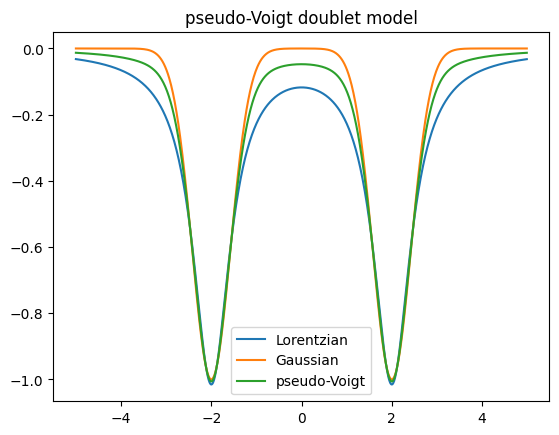

In [16]:
# plotting what the pseudo-Voigt doublet looks like
plt.figure()
x = np.arange(-5, 5, 0.01)

plt.plot(x, -two_pseudo_voigts(x, 0, 0, 1, 1,
         0.5, 0.5, -2, 2), label="Lorentzian")
plt.plot(x, -two_pseudo_voigts(x, 1, 1, 1, 1,
         0.5, 0.5,  -2, 2), label="Gaussian")
plt.plot(x, -two_pseudo_voigts(x, 0.5, 0.5, 1, 1,
         0.5, 0.5,  -2, 2), label='pseudo-Voigt')
plt.legend()
plt.title("pseudo-Voigt doublet model")

## Fitting Potassium Doublets using pseudo-Voigt model

In [17]:
# Importing the spectra to be used. The file is a dictionary of spectra arrays.
# data comes from simple-bd-archive.org

dbfile = open('example_spectra', 'rb')
dict_of_spectra = pickle.load(dbfile)
dbfile.close()

spectra_names = list(dict_of_spectra.keys())

2MASS J08533619-0329321
curve fit: nu1, nu2 A1, A2, σ1, σ2, μ1, μ2:  [ 4.05604659e-01  2.14253625e-01 -4.68229195e-14 -5.67981858e-14
  6.12326704e-04  6.86854312e-04  1.16934989e+00  1.17755845e+00]


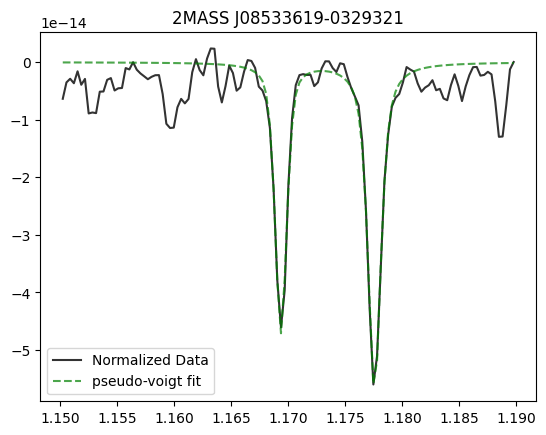

2MASS J02550357-4700509
curve fit: nu1, nu2 A1, A2, σ1, σ2, μ1, μ2:  [ 2.72743420e-20  4.54146972e-20 -4.33775174e-15 -6.34275162e-15
  1.62200899e-03  1.15803113e-03  1.16921492e+00  1.17769531e+00]


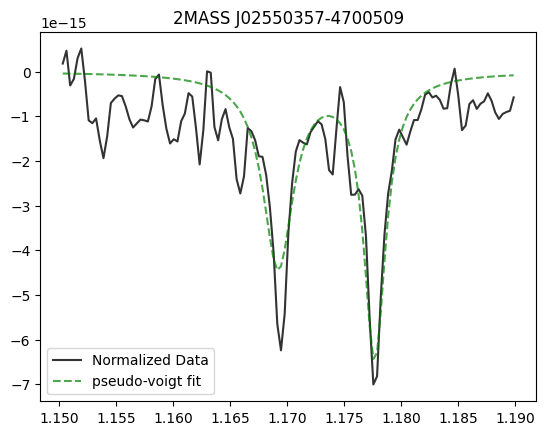

2MASS J22344161+4041387
curve fit: nu1, nu2 A1, A2, σ1, σ2, μ1, μ2:  [ 1.00000000e-10  1.00000000e-10 -3.06238359e-16 -4.53115882e-16
  6.67099954e-04  5.82603479e-04  1.16891410e+00  1.17720283e+00]


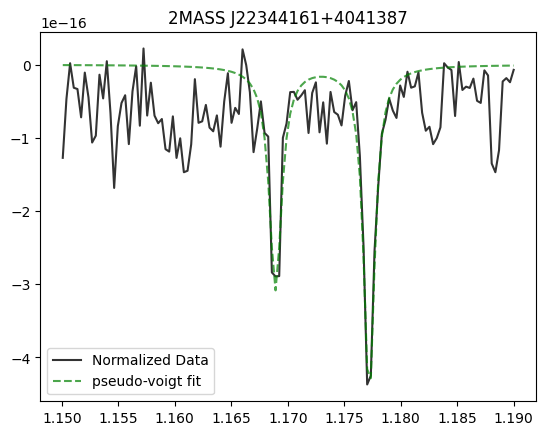

2MASS J00361617+1821104
curve fit: nu1, nu2 A1, A2, σ1, σ2, μ1, μ2:  [ 1.00000000e-10  1.00000000e-10 -1.68179207e-16 -1.91657358e-16
  6.90872516e-04  1.02571941e-03  1.16915876e+00  1.17777608e+00]


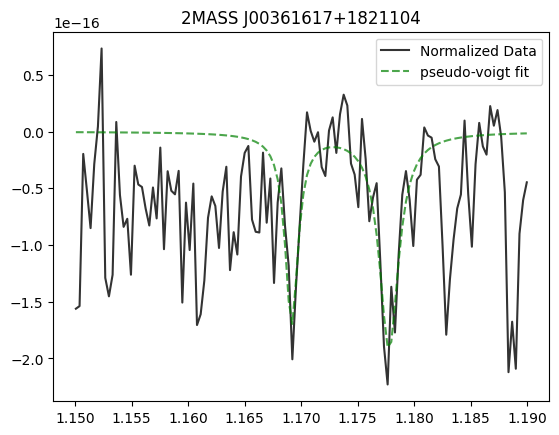

2MASS J03552337+1133437
curve fit: nu1, nu2 A1, A2, σ1, σ2, μ1, μ2:  [ 5.76709548e-20  6.22492573e-20 -1.90480710e-14 -2.17251425e-14
  8.73911333e-04  9.55320837e-04  1.16928240e+00  1.17753234e+00]


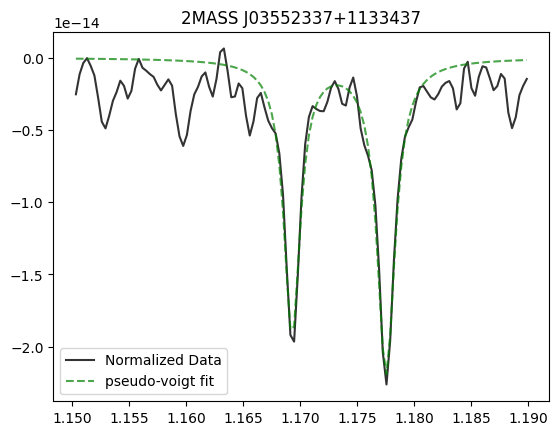

TWA 27
curve fit: nu1, nu2 A1, A2, σ1, σ2, μ1, μ2:  [ 1.19121530e-11  1.71785093e-01 -4.15852277e-16 -6.78319585e-16
  8.24025187e-04  5.89137624e-04  1.16928837e+00  1.17758492e+00]


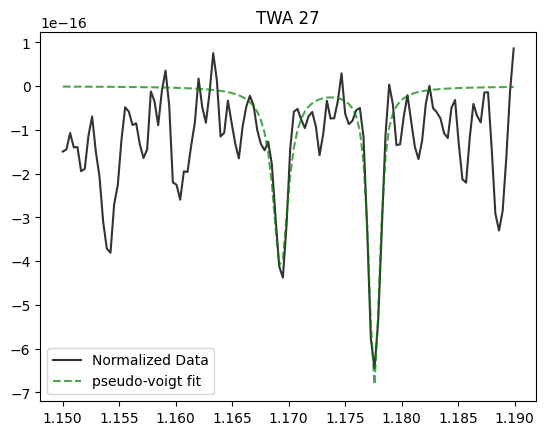

2MASS J05395200-0059019
curve fit: nu1, nu2 A1, A2, σ1, σ2, μ1, μ2:  [ 1.00000000e+00  1.00000000e+00 -2.36815679e-16 -3.95408707e-16
  5.76845712e-04  6.46062954e-04  1.16917688e+00  1.17748478e+00]


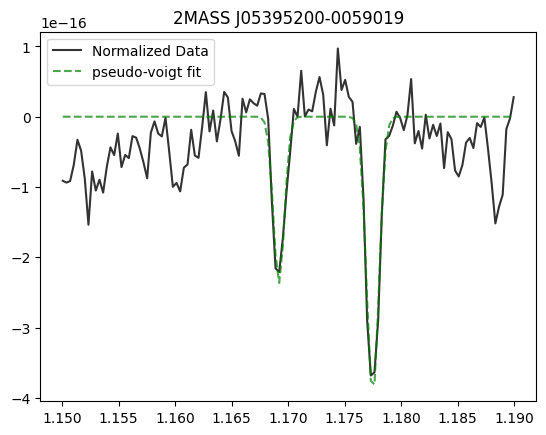

2MASS J08251968+2115521
curve fit: nu1, nu2 A1, A2, σ1, σ2, μ1, μ2:  [ 5.77865274e-20  9.41055853e-20 -3.91742600e-15 -4.69353656e-15
  1.04168477e-03  1.07629580e-03  1.16940011e+00  1.17770612e+00]


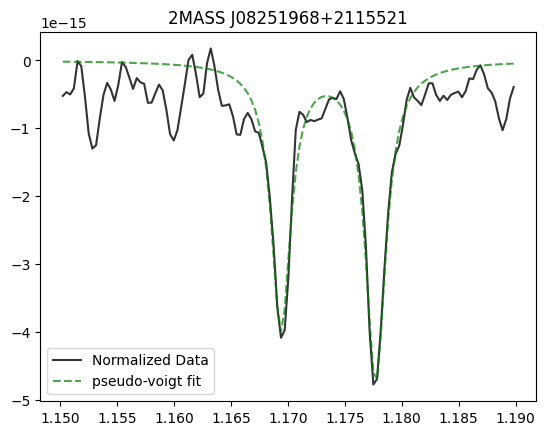

2MASS J01415823-4633574
curve fit: nu1, nu2 A1, A2, σ1, σ2, μ1, μ2:  [ 2.88880809e-20  2.81296959e-19 -8.23345372e-16 -1.09720877e-15
  1.18436240e-03  7.37677401e-04  1.16952228e+00  1.17782000e+00]


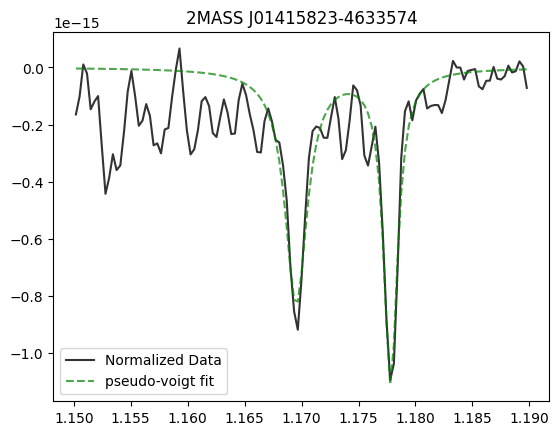

2MASS J06085283-2753583
curve fit: nu1, nu2 A1, A2, σ1, σ2, μ1, μ2:  [ 1.00000000e-10  1.00000000e-10 -2.32151746e-01 -3.31626863e-01
  7.09941425e-04  7.51819557e-04  1.16948656e+00  1.17762130e+00]


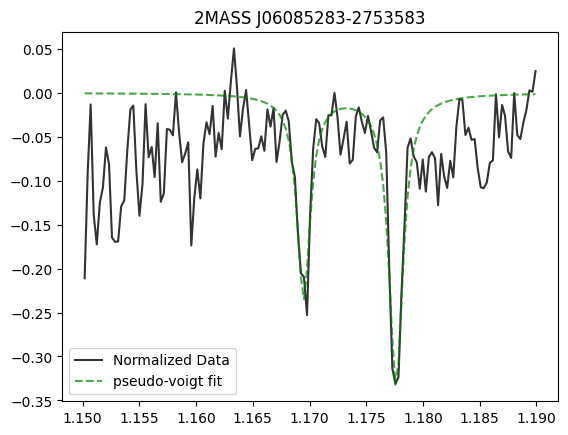

2MASS J12074836-3900043
curve fit: nu1, nu2 A1, A2, σ1, σ2, μ1, μ2:  [ 7.45464347e-01  8.00962139e-02 -5.50216716e-16 -7.47065930e-16
  4.99095206e-04  5.85837715e-04  1.16909759e+00  1.17735480e+00]


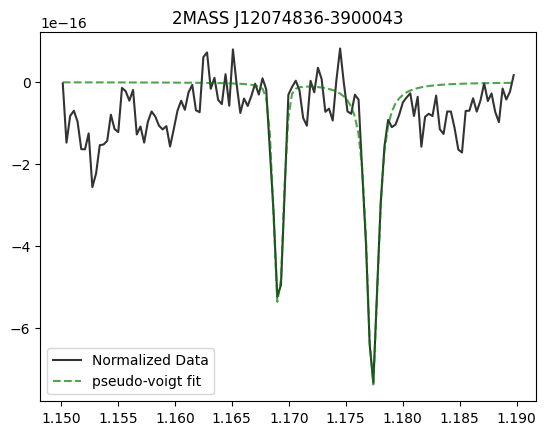

LHS 2924
curve fit: nu1, nu2 A1, A2, σ1, σ2, μ1, μ2:  [ 1.07477218e-19  1.01484075e-19 -2.84745741e-15 -3.76850112e-15
  2.88696674e-03  1.76489709e-03  1.16913186e+00  1.17768093e+00]


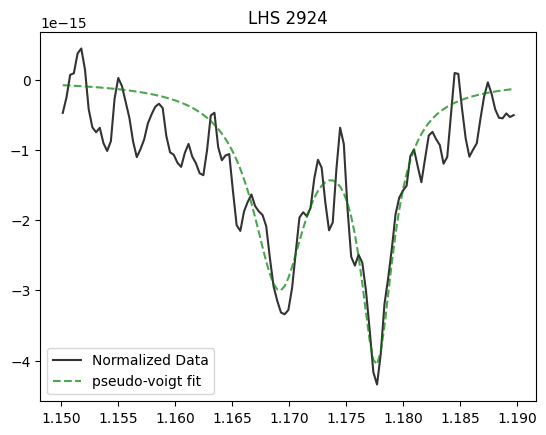

In [18]:
# fitting the potassium doublets in each
for source in spectra_names:
    print(source)

    fit_two_curves(dict_of_spectra[source],  # this is the array of spectra
                   [1.15, 1.19],  # this is the continuum region of the spectra
                   # this is the absorption region where the doublet exists
                   [1.165, 1.183],
                   function='pseudo-voigt',  # chosen function to fit the doublet
                   show=True)

    plt.title(source)
    plt.show()